In [108]:
import pandas as pd
from feature_engine.creation import CyclicalFeatures
import pickle
from xgboost import XGBClassifier
import shap

In [109]:
df = pd.read_csv('df_predict.csv', parse_dates=['Timestamp'])

In [110]:
def preprocess(df):
    df['Hour'] = df['Timestamp'].dt.hour
    cyclic = CyclicalFeatures(variables=None, drop_original=True)
    conv = cyclic.fit_transform(df[['Hour']])
    df = pd.concat([df, conv], axis=1).drop('Hour', axis=1)

    df['Weekend'] = df['Timestamp'].apply(lambda x: x.weekday() >= 5)
    df['Weekend'] = df['Weekend'].astype(int)

    df = df.drop('Timestamp', axis=1)
    df = pd.get_dummies(df, dtype='int')

    return df    

In [111]:
df = preprocess(df)

In [112]:
xgb = pickle.load(open('xgb.pkl', 'rb'))

In [113]:
df_results = pd.DataFrame(xgb.predict(df[xgb.get_booster().feature_names]), columns=['Clicked on Ad'])

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [114]:
df

,Age,Male,Introvert,Area Income,Daily Internet Usage,Daily Time Spent on Site,Hour_sin,Hour_cos,Weekend,Continent_Africa,...,Continent_South America,Ad Location_Lower Banner,Ad Location_Pop Up,Ad Location_Push Notif,Ad Location_Upper Banner,Ad Category_Fashion,Ad Category_Finance,Ad Category_Food,Ad Category_Games,Ad Category_Travel
0,29,1,0,54787.37,120.46,63.26,0.887885,0.460065,0,1,...,0,0,0,1,0,0,1,0,0,0
1,52,0,1,41521.28,122.59,71.23,0.136167,-0.990686,0,0,...,0,0,1,0,0,0,1,0,0,0
2,38,1,1,61757.12,135.25,43.63,-0.887885,0.460065,0,0,...,0,0,0,0,1,0,1,0,0,0
3,49,0,0,67323.00,182.11,42.04,-0.942261,-0.334880,0,0,...,0,0,1,0,0,0,1,0,0,0
4,29,0,0,66225.72,208.05,78.68,-0.942261,-0.334880,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,32,0,1,72272.90,210.54,74.02,-0.631088,-0.775711,0,0,...,0,0,0,1,0,0,0,1,0,0
246,32,1,0,43870.51,211.87,88.72,-0.997669,-0.068242,1,1,...,0,0,0,1,0,0,0,1,0,0
247,33,1,0,54541.56,238.99,82.73,-0.519584,0.854419,0,0,...,0,0,0,0,1,1,0,0,0,0
248,31,0,0,74535.94,184.10,70.79,-0.816970,-0.576680,0,0,...,0,0,0,1,0,0,0,1,0,0


In [115]:
df_results[df_results['Clicked on Ad'] == 1].index

Index([  0,   1,   2,   3,   5,   7,   9,  11,  12,  14,
       ...
       221, 222, 223, 230, 231, 233, 234, 236, 238, 249],
      dtype='int64', length=128)

In [116]:
df.iloc[df_results[df_results['Clicked on Ad'] == 1].index]

,Age,Male,Introvert,Area Income,Daily Internet Usage,Daily Time Spent on Site,Hour_sin,Hour_cos,Weekend,Continent_Africa,...,Continent_South America,Ad Location_Lower Banner,Ad Location_Pop Up,Ad Location_Push Notif,Ad Location_Upper Banner,Ad Category_Fashion,Ad Category_Finance,Ad Category_Food,Ad Category_Games,Ad Category_Travel
0,29,1,0,54787.37,120.46,63.26,0.887885,0.460065,0,1,...,0,0,0,1,0,0,1,0,0,0
1,52,0,1,41521.28,122.59,71.23,0.136167,-0.990686,0,0,...,0,0,1,0,0,0,1,0,0,0
2,38,1,1,61757.12,135.25,43.63,-0.887885,0.460065,0,0,...,0,0,0,0,1,0,1,0,0,0
3,49,0,0,67323.00,182.11,42.04,-0.942261,-0.334880,0,0,...,0,0,1,0,0,0,1,0,0,0
5,34,0,0,51816.27,153.01,87.85,0.816970,-0.576680,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,54,0,1,53188.69,134.46,48.86,-0.997669,-0.068242,1,0,...,1,0,1,0,0,0,1,0,0,0
234,23,0,1,30227.98,212.58,55.60,-0.631088,-0.775711,0,1,...,0,0,0,1,0,0,0,1,0,0
236,32,1,0,31092.93,136.40,46.77,0.997669,-0.068242,0,0,...,0,1,0,0,0,0,0,0,1,0
238,49,1,1,42993.48,110.57,60.70,0.730836,0.682553,1,0,...,1,0,0,1,0,0,1,0,0,0


In [125]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(df.iloc[df_results[df_results['Clicked on Ad'] == 1].index])

[10:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


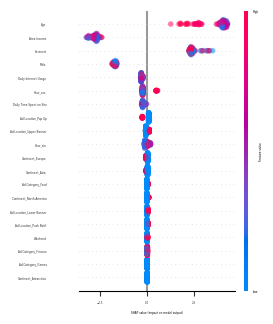

In [165]:
shap.summary_plot(shap_values, features=df.iloc[df_results[df_results['Clicked on Ad'] == 1].index], alpha=0.5, show=False)
fig = plt.gcf()
fig.set_size_inches(3, 3)
for ax in fig.get_axes():
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(2)
plt.show()

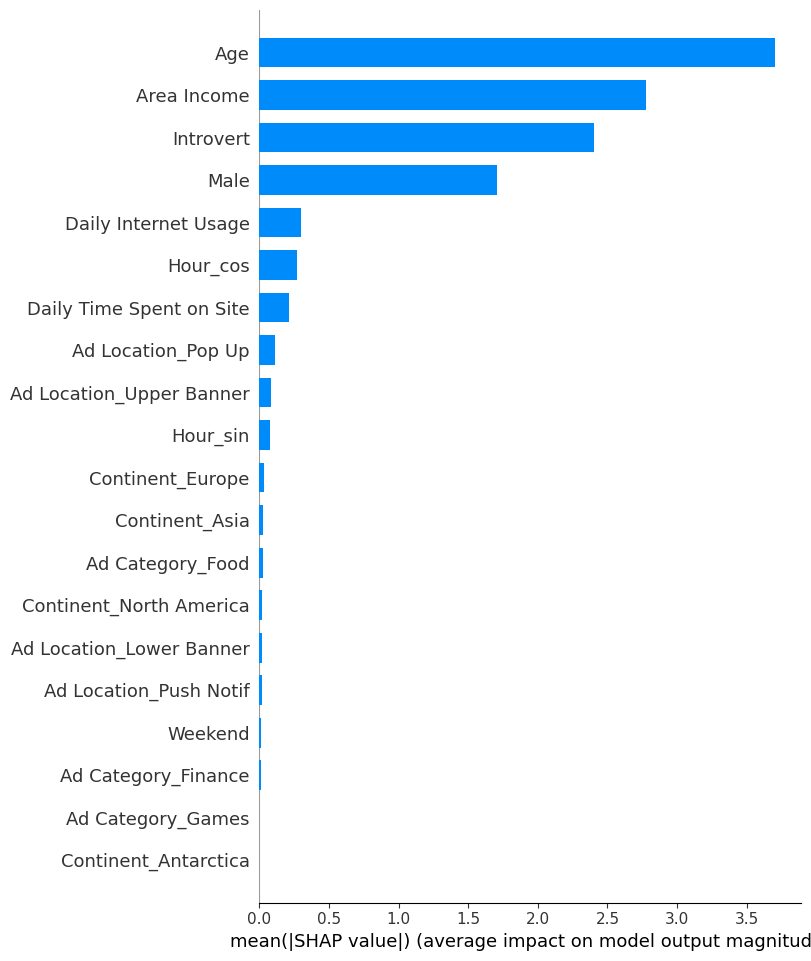

In [166]:
shap.summary_plot(shap_values, features=df.iloc[df_results[df_results['Clicked on Ad'] == 1].index], alpha=0.5, plot_type='bar')